<a href="https://colab.research.google.com/github/Ansubasnet-creator/2510322_ansu/blob/main/2510322_AnsuBasnet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Classificationdataset/predictive_maintenance.csv")
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()


,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
# Drop ID-like columns if present
if 'UDI' in df.columns:
    df.drop(columns=['UDI'], inplace=True)


In [ ]:
print(df.columns)


Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')


In [ ]:
df.rename(columns={'Failure Type': 'failure_type'}, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['failure_type'] = le.fit_transform(df['failure_type'])


In [ ]:
print(df.columns)


Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'failure_type'],
      dtype='object')


In [ ]:
print(df['failure_type'].value_counts())


failure_type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64


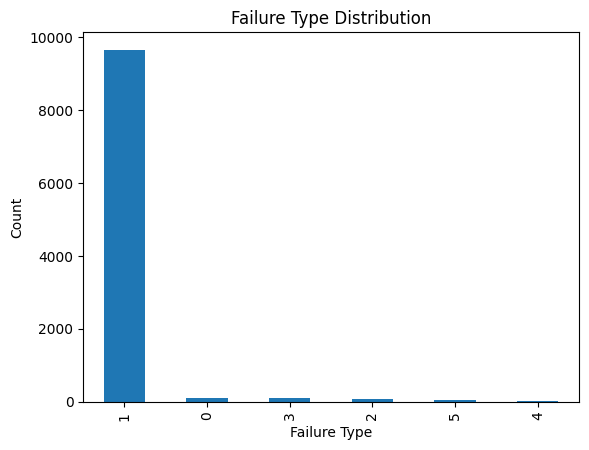

In [ ]:
plt.figure()
df['failure_type'].value_counts().plot(kind='bar')
plt.title("Failure Type Distribution")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.show()


In [ ]:
X = df.drop('failure_type', axis=1)
y = df['failure_type']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
X.dtypes


,0
Product ID,object
Type,object
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Target,int64


In [ ]:
X = X.drop(columns=['Product ID', 'Type'])


In [ ]:
X.dtypes


,0
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Target,int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

nn_model.fit(X_train_scaled, y_train)

y_pred_nn = nn_model.predict(X_test_scaled)

print("Neural Network Results")
print(classification_report(y_test, y_pred_nn))


Neural Network Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00      1930
           2       0.83      0.94      0.88        16
           3       1.00      0.95      0.97        19
           4       0.00      0.00      0.00         4
           5       0.88      0.78      0.82         9

    accuracy                           1.00      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.99      1.00      1.00      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1-Score": f1_score(y_true, y_pred, average='weighted')
    }

print("Logistic Regression:", evaluate_model(y_test, y_pred_lr))
print("Decision Tree:", evaluate_model(y_test, y_pred_dt))


Logistic Regression: {'Accuracy': 0.9955, 'Precision': 0.9940993745998917, 'Recall': 0.9955, 'F1-Score': 0.9943774830731352}
Decision Tree: {'Accuracy': 0.9925, 'Precision': 0.9924736938253563, 'Recall': 0.9925, 'F1-Score': 0.9924411342381686}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10]
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='f1_weighted'
)

grid_lr.fit(X_train_scaled, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Logistic Regression CV Score:", grid_lr.best_score_)


Best Logistic Regression Params: {'C': 10}
Best Logistic Regression CV Score: 0.9941504279952911


In [ ]:
param_grid_dt = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='f1_weighted'
)

grid_dt.fit(X_train, y_train)

print("Best Decision Tree Params:", grid_dt.best_params_)
print("Best Decision Tree CV Score:", grid_dt.best_score_)


Best Decision Tree Params: {'max_depth': 5, 'min_samples_split': 5}
Best Decision Tree CV Score: 0.9908150399228279


In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(
    estimator=LogisticRegression(max_iter=1000),
    n_features_to_select=5
)

rfe.fit(X_train_scaled, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')


In [ ]:
X_train_sel = X_train_scaled[:, rfe.support_]
X_test_sel = X_test_scaled[:, rfe.support_]

final_model = grid_lr.best_estimator_
final_model.fit(X_train_sel, y_train)

final_pred = final_model.predict(X_test_sel)

print("Final Model Performance")
print(classification_report(y_test, final_pred))


Final Model Performance
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        22
           1       0.98      1.00      0.99      1930
           2       0.50      0.31      0.38        16
           3       0.93      0.68      0.79        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.98      2000
   macro avg       0.53      0.44      0.48      2000
weighted avg       0.97      0.98      0.97      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
final_results = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Features Used": len(selected_features),
        **evaluate_model(y_test, final_pred)
    }
])

final_results


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Features Used,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,5,0.9775,0.969127,0.9775,0.972837
